## Frequent Itemsets

### Bibliotheken

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

# Nieuwe dependencies
import seaborn as sns
from apriori_python.utils import *
from mlxtend.frequent_patterns import apriori

### Data selecteren

In [5]:
customer_df = pd.read_csv('C:/Users/perta/Documents/Project Deds/deds_proj_groep1/6_Data/merged_customer_df.csv')
customer_df

,id,fname,lname,address,city,state,zip,phone,company_name,IDSK,...,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,101,Michaels,Devlin,3114 Pioneer Avenue,Rutherford,NJ,07070,2015558966,The Power Group,1,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,102,Beth,Reiser,1033 Whippany Road,New York,NY,10154,2125558725,AMF Corp.,2,...,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,103,Erin,Niedringhaus,1990 Windsor Street,Paoli,PA,19301,2155556513,Darling Associates,3,...,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,104,Meghan,Mason,550 Dundas Street East,Knoxville,TN,37919,6155555463,P.S.C.,4,...,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,105,Laura,McCarthy,1210 Highway 36,Carmel,IN,46032,3175558437,Amo & Sons,5,...,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,187,Sebouh,Bensoul,8024 Van Ness Way,Peoria,IL,61614,3095556915,Bensoul's Boutique,87,...,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,NaN,90110,Finland,981-443655,981-443655
87,188,Vartan,Berenberg,1020 110th Avenue N.E.,Northbrook,IL,60062,7085552914,Diva's Design,88,...,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,NaN
88,189,Herbert,Berejiklian,1535 Municiple Drive,Cambridge,MA,02142,6175553547,Out of Town Sports,89,...,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
89,190,Randy,Arlington,1635 N Franklin Turnpike,Detriot,MI,48214,3135555716,Jim Dandy's,90,...,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858


In [6]:
customer_df.columns

Index(['id', 'fname', 'lname', 'address', 'city', 'state', 'zip', 'phone',
       'company_name', 'IDSK', 'CustomerID', 'CompanyName', 'ContactName',
       'ContactTitle', 'Address', 'City', 'Region', 'PostalCode', 'Country',
       'Phone', 'Fax'],
      dtype='object')

In [39]:
customer_df.state.unique()

['NJ', 'NY', 'PA', 'TN', 'IN', ..., 'MI', 'DC', 'GA', 'CO', 'BC']
Length: 28
Categories (28, object): ['BC', 'CA', 'CO', 'CT', ..., 'UT', 'VA', 'WA', 'WI']

### Transacties maken

In [40]:
transactions = customer_df.groupby('IDSK')['state'].apply(list)

In [41]:
# Importeer de TransactionEncoder uit mlxtend.preprocessing
from mlxtend.preprocessing import TransactionEncoder

# Maak een instantie van TransactionEncoder
te = TransactionEncoder()

# Pas de fit methode toe op de transacties om de encoder aan te passen aan de gegeven transacties
te_ary = te.fit(transactions).transform(transactions)

# Maak een DataFrame met de resulterende geëncodeerde array, waarbij de kolommen de unieke items in de transacties vertegenwoordigen
df = pd.DataFrame(te_ary, columns=te.columns_)

In [45]:
# Importeer de apriori functie uit mlxtend.frequent_patterns
from mlxtend.frequent_patterns import apriori

# Pas de apriori functie toe op de DataFrame met behulp van de opgegeven minimumsupport en gebruik de kolomnamen
frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)


In [43]:
# Association rules genereren met behulp van de frequent itemsets en een minimum threshold voor de lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0001)

# Regels sorteren op basis van confidence en lift
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Bovenste regels weergeven
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


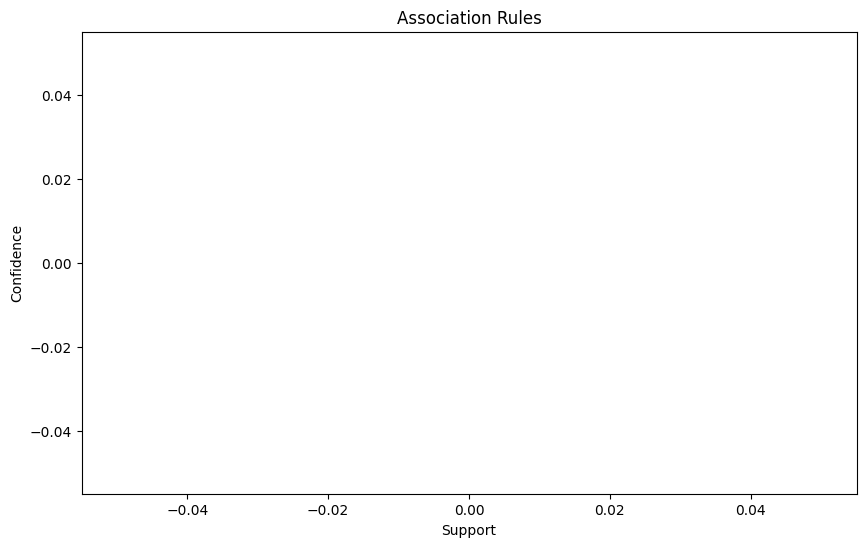

In [20]:
# Data weergeven met behulp van een scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()